# Titanic - Machine learning

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
df=pd.read_csv('../csv/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [306]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [307]:
x,y=df.drop(columns=['Survived']),df.Survived

In [308]:
x.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [309]:
x.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [310]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [311]:
# remove- passengerId
x.drop(columns=['PassengerId','Cabin'],inplace=True)
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [312]:
# Extracting titles from name
x.Name=x.Name.str.split(',',expand=True)[1]
x['Title']=x.Name.str.split('.',expand=True)[0]
x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,S,Mrs
4,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,S,Mr


In [313]:
x.drop(columns=['Name','Ticket'],inplace=True)

In [314]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [315]:
# combing parch sib as one feature
x['Family']=x.Parch+x.SibSp+1

In [316]:
x.Family.value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [317]:
def fam_type(fam):
    if fam==1:
        return 0
    elif fam>1 and fam<=4:
        return 1
    else:
        return 2
x.Family=x.Family.apply(fam_type)

In [318]:
counts=x.Title.value_counts()
counts

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [319]:
# Title count less than threshold converting all to others
threshold=35
x.replace(counts[counts<threshold].index,
          'others',inplace=True)

In [320]:
x.sample(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
57,3,male,28.5,0,0,7.2292,C,Mr,0
410,3,male,NaN,0,0,7.8958,S,Mr,0
886,2,male,27.0,0,0,13.0000,S,others,0
234,2,male,24.0,0,0,10.5000,S,Mr,0
269,1,female,35.0,0,0,135.6333,S,Miss,0
219,2,male,30.0,0,0,10.5000,S,Mr,0
107,3,male,NaN,0,0,7.7750,S,Mr,0
117,2,male,29.0,1,0,21.0000,S,Mr,1
579,3,male,32.0,0,0,7.9250,S,Mr,0
174,1,male,56.0,0,0,30.6958,C,Mr,0


In [321]:
# dropping sib par
x.drop(columns=['SibSp','Parch'],inplace=True)

In [322]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,male,22.0,7.2500,S,Mr,1
1,1,female,38.0,71.2833,C,Mrs,1
2,3,female,26.0,7.9250,S,Miss,0
3,1,female,35.0,53.1000,S,Mrs,1
4,3,male,35.0,8.0500,S,Mr,0


In [323]:
x.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\moury\AppData\Local\Temp\ipykernel_19368\1539877588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Age'])


<Axes: xlabel='Age', ylabel='Density'>

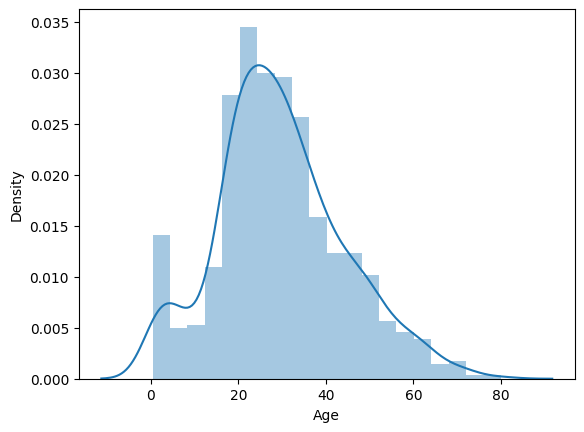

In [324]:
sns.distplot(x['Age'])

C:\Users\moury\AppData\Local\Temp\ipykernel_19368\2055372049.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

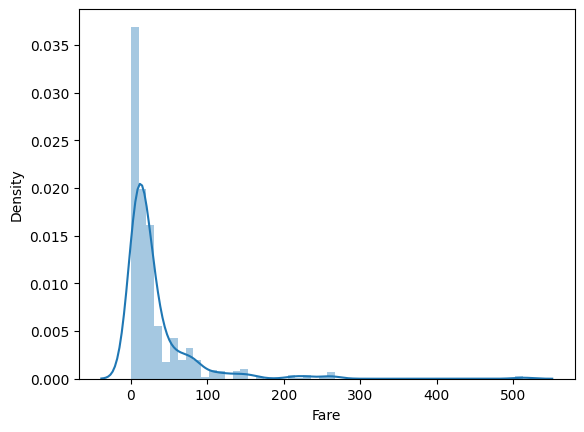

In [325]:
sns.distplot(x['Fare'])

In [326]:
x.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,male,22.0,7.2500,S,Mr,1
1,1,female,38.0,71.2833,C,Mrs,1
2,3,female,26.0,7.9250,S,Miss,0
3,1,female,35.0,53.1000,S,Mrs,1
4,3,male,35.0,8.0500,S,Mr,0


In [327]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin


In [328]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [329]:
class IQRClipper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.columns_ = X.columns
        self.Q1 = X.quantile(0.25)
        self.Q3 = X.quantile(0.75)
        self.IQR = self.Q3 - self.Q1
        return self

    def transform(self, X):
        X = pd.DataFrame(X, columns=self.columns_)
        lower = self.Q1 - self.factor * self.IQR
        upper = self.Q3 + self.factor * self.IQR
        return X.clip(lower=lower, upper=upper)


In [330]:
#Embarked Transform
trf1=(
    'embarked',Pipeline([
        ('SimpleImputer',SimpleImputer(strategy='most_frequent')),
        ('Encoding',OneHotEncoder(handle_unknown='ignore'))
    ]),['Embarked']
)

In [331]:
# Age Transform
trf2=(
    'age',Pipeline([
        ('outlier',IQRClipper()),
        ('imputer',IterativeImputer()),
        ('scaling',StandardScaler())
    ]),['Age']
)

In [332]:
# title transform
trf3=(
    'title',Pipeline([
        ('Encoding',OneHotEncoder(handle_unknown='ignore'))
    ]),['Title']
)

In [333]:
#  fare scaling
trf4=(
    'fare',Pipeline([
        ('outlier',IQRClipper()),
        ('scaling',StandardScaler())
    ]),['Fare']
)

In [334]:
# gender transform
trf5=(
    'gender',Pipeline([
        ('encoding',LabelEncoder())
    ]),['Sex']
)

In [335]:
transformer=ColumnTransformer([trf1,trf2,trf3,trf4,trf5],remainder='passthrough')

In [336]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [337]:
transformer.fit_transform(x_train)
transformer.transform(x_test)

ValueError: Must specify axis=0 or 1